### Минаков Артём ПМ19-3
### Сравнение традиционных методов МО и искусственных нейронных сетей в задаче прогнозирования стоимости недвижимости

**В работе я буду прогнозировать стоимость недвижимости в Калифорнии.**
 
**В качетсве датасета буду использовать данные с сайта kaggle (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)**

**Первая часть будет посвящена обработке данных**

In [7]:
# Первоначальную обработку данных и отбор признаков произведу в этом ноутбуке
# для обучения нейронной сети буду передавать уже обработанные данные

### Подгружаю необходимые библиотеки

In [112]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

sb.set_style('whitegrid')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8 

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import xgboost
from sklearn.preprocessing import LabelEncoder

### Смотрю на данные, строю визуализации, отбираю признаки

In [16]:
# About this file
# 1. longitude: A measure of how far west a house is; a higher value is farther west

# 2. latitude: A measure of how far north a house is; a higher value is farther north

# 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

# 4. totalRooms: Total number of rooms within a block

# 5. totalBedrooms: Total number of bedrooms within a block

# 6. population: Total number of people residing within a block

# 7. households: Total number of households, a group of people residing within a home unit, for a block

# 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

# 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

# 10. oceanProximity: Location of the house w.r.t ocean/sea

In [78]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [80]:
print("Data shape Before duplicates Values: ",data.shape)
data.drop_duplicates(inplace=True)
print("Data shape After duplicates Values: ",data.shape)

Data shape Before duplicates Values:  (20640, 10)
Data shape After duplicates Values:  (20640, 10)


In [81]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [82]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [83]:
# Пустых значений немного, не стану заполнять их средним или применять продвинутые методы заполнения значений
# Просто удалю строки, содержащие пропуски
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [84]:
#data.drop(['id','date'], axis = 1, inplace = True)

In [85]:
data['ocean_proximity'] = LabelEncoder().fit_transform(data['ocean_proximity'])


In [86]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [87]:
correlations = data.corr()
correlations

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.289530
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.200801
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.112330
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.015363
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.069630
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.018251
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.014679
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.080488
ocean_proximity,-0.289530,0.200801,0.112330,-0.015363,-0.014768,-0.069630,-0.018251,-0.014679,0.080488,1.000000


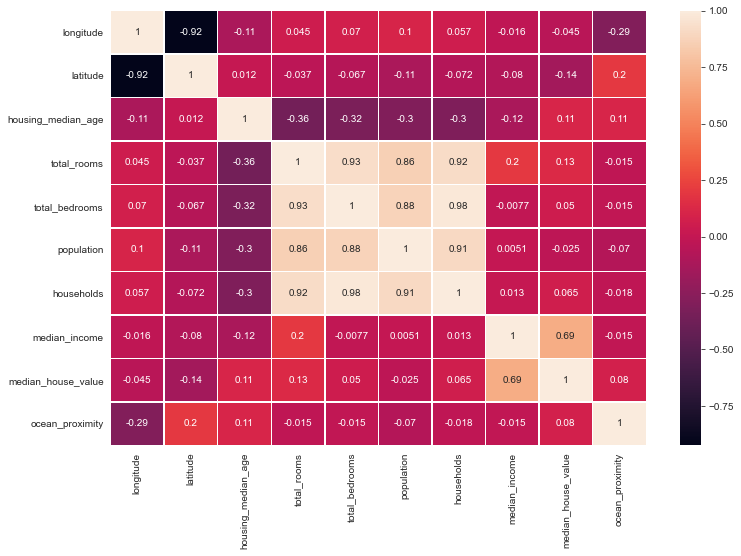

In [88]:
sb.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns,
        annot=True, linewidth=0.5)
plt.show()

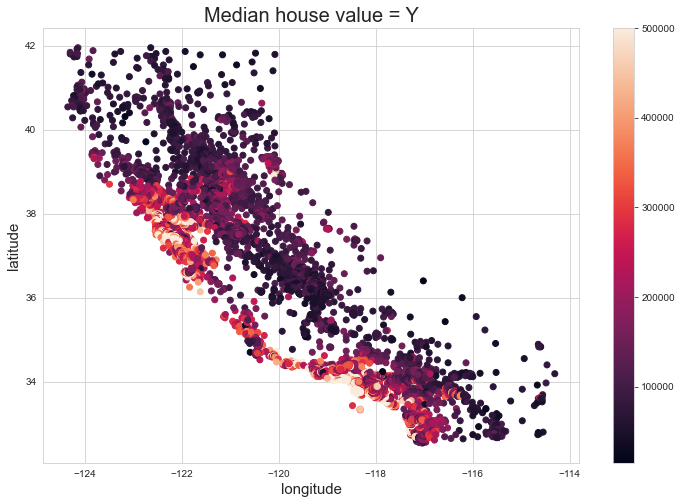

In [89]:
plt.scatter(data['longitude'] , data['latitude'] , c = data['median_house_value'])
plt.colorbar()
plt.xlabel("longitude", fontsize=15)
plt.ylabel("latitude", fontsize=15)
plt.title("Median house value = Y", fontsize=20)
plt.show()

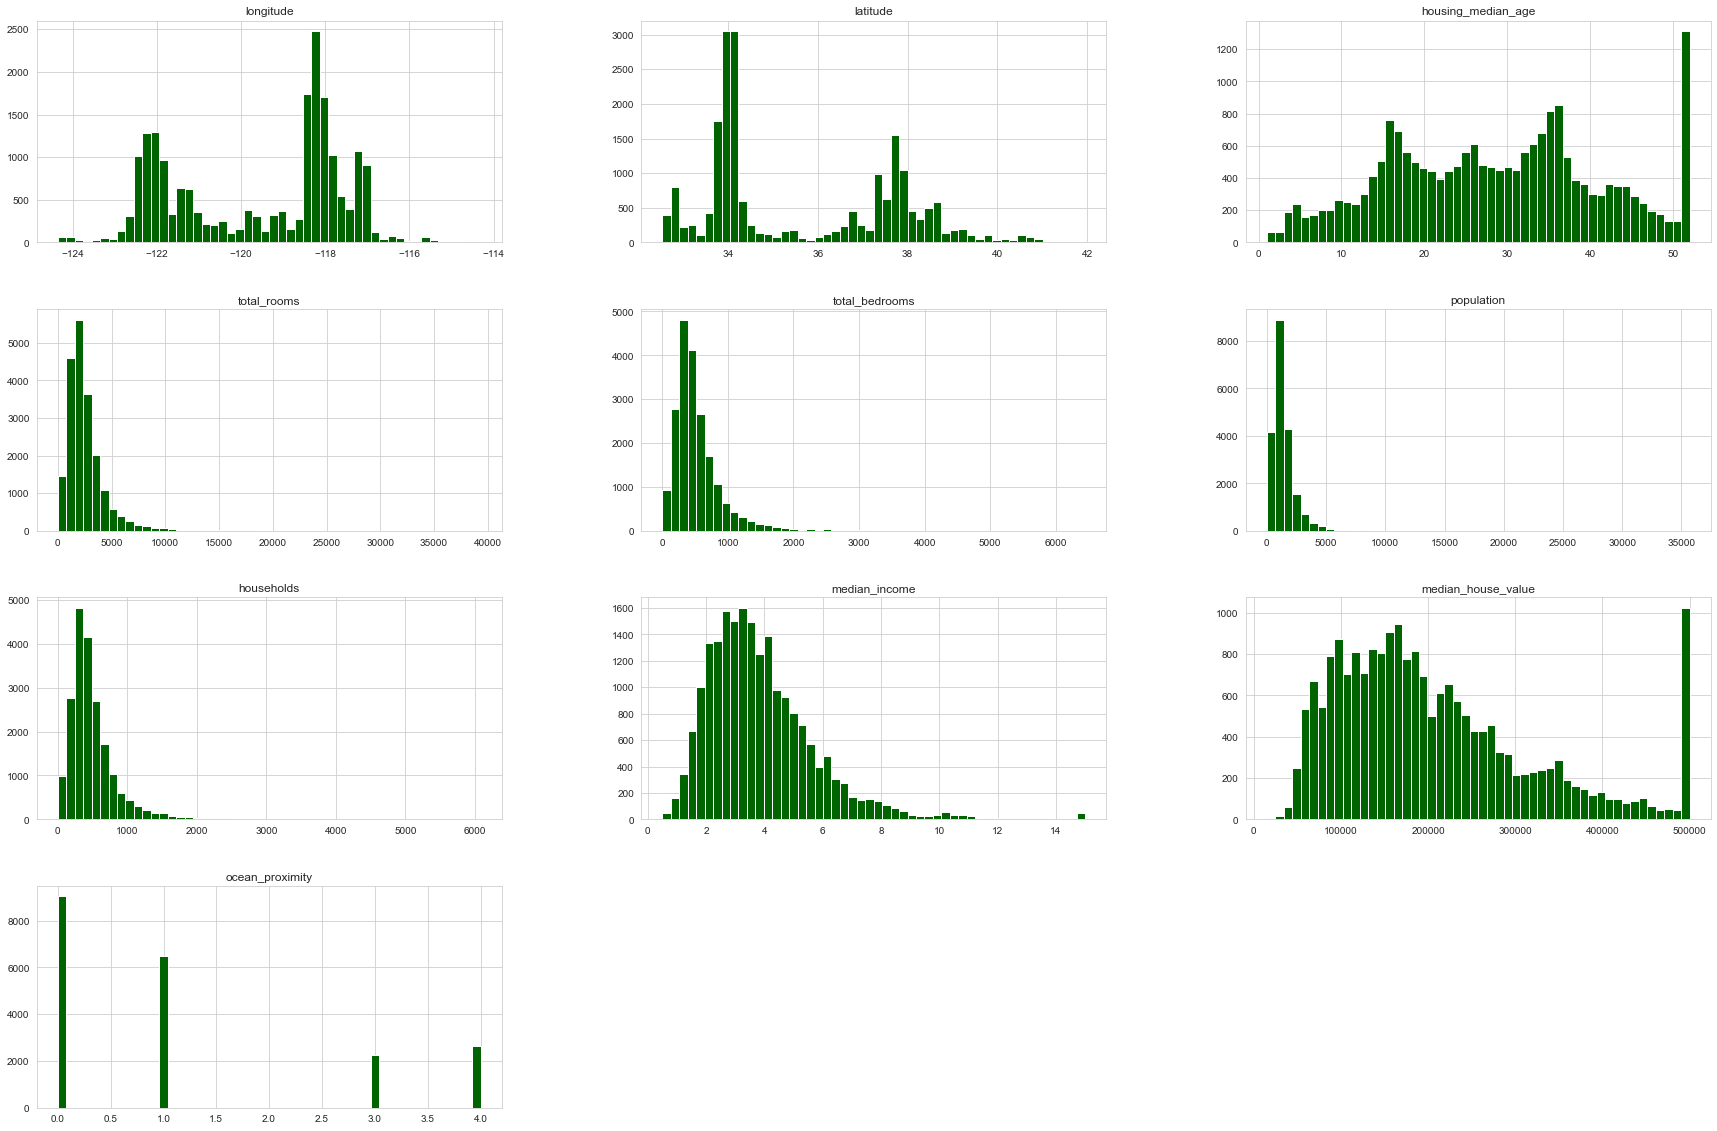

In [90]:
data.hist(bins = 50 , figsize=(30 , 20), color="darkgreen")
plt.show()

In [91]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [92]:
import plotly.express as px

In [93]:
fig = px.histogram(data['median_house_value'], nbins = 100)
fig.show()

In [94]:
fig = px.histogram(data['housing_median_age'])
fig.show()

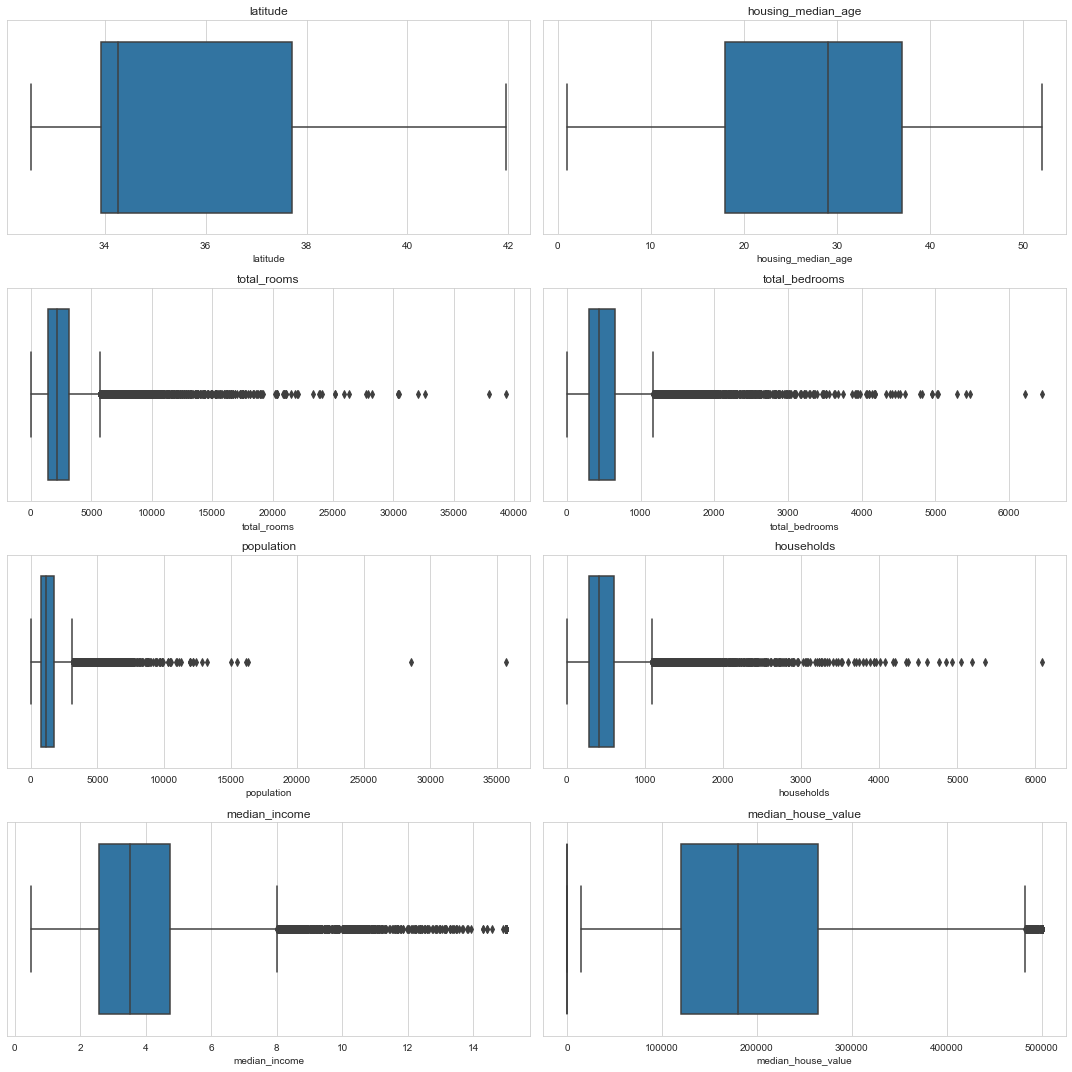

In [96]:
num_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, ax = plt.subplots(4,2, figsize = (15,15))
font_dict = {'fontsize': 14}
ax = np.ravel(ax)

for i in num_columns:
    sb.boxplot(data=data,x=i,ax=ax[num_columns.index(i)-1]).set_title(i)

ax = np.reshape(ax, (4, 2))
plt.tight_layout()
plt.show()

In [97]:
x = data.drop(['median_house_value'] , axis = 1)
y = data['median_house_value'].values

In [98]:
scaler_Robust = preprocessing.RobustScaler()
robust_df = scaler_Robust.fit_transform(x)
robust_df = pd.DataFrame(robust_df,columns=list(x.columns ))

In [99]:
scaler_MinMax = preprocessing.MinMaxScaler()
x = scaler_MinMax.fit_transform(robust_df)

In [100]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [103]:
x_train.shape , x_test.shape ,y_train.shape, y_test.shape 

((16346, 9), (4087, 9), (16346,), (4087,))

In [127]:
pd.DataFrame(x_train).to_csv('x_train_nn1.csv', index = False)
pd.DataFrame(x_test).to_csv('x_test_nn1.csv', index = False)
pd.DataFrame(y_train).to_csv('y_train_nn1.csv', index = False)
pd.DataFrame(y_test).to_csv('y_test_nn1.csv', index = False)